# Aula 12 - Análise exploratória de dados em Python

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Análise exploratória de dados em Python - base do Titanic

_____________

### Problema gerador: Titanic - mulheres e crianças primeiro? Jack e Rose exisrtiram?

Aprenderemos na aula de hoje o importante conceito de **análise exploratória de dados**, utilizando uma base com informações do famoso naufrágio do Titanic. 

___

## 1) Análise exploratória de dados

Uma habilidade **MUITO** importante que cientistas de dados devem ter é a de **olhar pros dados**, que quer dizer explorar os dados, ver do que eles se tratam, se habituar com eles.

Essa etapa é muitíssimo importante para que as etapas seguintes, em especial a de modelagem, funcionem adequadamente!

Dentro do jargão da área, essa etapa se chama ***Exploratory Data Analysis*** (**Análise Exploratória dos Dados**), ou simplesmente EDA. Quando dizemos "olhar pros dados", é a isso que nos referimos!

A etapa de EDA é muitíssimo importante, e deve tomar grande parte de um projeto de ciência de dados, como já discutimos, e ela comumente feita também com o auxílio de **gráficos** e outras ferramentas visuais. Faremos isso nas próximas aulas, depois que aprendermos sobre ferramentas importantíssimas de **visualização de dados** (*dataviz*).

Por hora, faremos a EDA apenas utilizando o pandas, utilizando diversos métodos e funções específicas.

Lembre-se: o objetivo é que exploremos os dados o máximo possível! 

Então, essa é a etapa em que:

- Formulamos as perguntas importantes;
- E tentamos respondê-las com base nos dados!

Vamos lá?

____
____
____

## Base de dados do Titanic

Agora exploraremos um pouco mais a fundo o dataset do <a href="https://www.kaggle.com/c/titanic">Titanic</a>.

Faremos a leitura da base, e também os primeiros passos da EDA, respondendo diversas perguntas muito interessantes.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic_completa_oficial.csv", na_values="?")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
frequencia = df['Sex'].value_counts()

In [6]:
percentual = df['Sex'].value_counts(normalize=True)

In [7]:
qtd_sexo = pd.DataFrame({'Frequência':frequencia , 'Percentual (%)':percentual })
qtd_sexo

,Frequência,Percentual (%)
Sex,,
male,577,0.647587
female,314,0.352413


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
(df.isnull().sum()/df.shape[0])

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
(df.isnull().sum()/df.shape[0])*100 # descobrindo a porcentagem de valores nulos de cada coluna

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

__________________

Agora que os dados foram lidos, vamos começar a **olhar** pra eles

O que fazer com dados missing? Vamos discutir isso mais tarde!

Por enquanto, vamos continuar explorando a base

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


A informação acima é fundamental para diferenciarmos quais colunas contêm dados **categóricos** e quais contêm dados **numéricos**

- **Dados categóricos/qualitativos**: são dados qualitativos, quase sempre expressos na forma de **strings**. Praticamente todos os modelos não conseguem lidar com dados categóricos diretamente. Por isso, se quisermos utilizá-los, teremos que fazer algum procedimento que trasnforme os dados categórios em dados numéricos. Veremos como fazer isso mais pra frente.

- **Dados numéricos**: são dados numéricos, que podemos utilizar diretamente!

In [12]:
import numpy as np

In [13]:
np.number

numpy.number

In [14]:
df.select_dtypes(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [15]:
# select_dtype possibilita a remoção de tabelas que contenham um tipo de dados específico
# neste caso estamos mantendo apenas colunas que possuem dados do tipo numérico
# para excluir (exclude) | para manter (include)

df.select_dtypes(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


____


____

Vamos analisar os dados um pouco mais!


Perfil demográfico do titanic (em termo das classes)

In [16]:
# quantas pessoas tem na base?

df.shape[0]

891

In [17]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
# quais as classes?

df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [19]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [20]:
df["Pclass"].nunique() # conta a quantidade de valores únicos que possui na base

3

In [21]:
len(df["Pclass"].unique()) # conta a quantidade de valores únicos que possui na base (mesma coisa que nunique)

3

In [22]:
df["Pclass"].value_counts() # contando a quantidade de pessoas de cada classe

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [23]:
(df["Pclass"].value_counts(normalize=True))*100 # normaliza os resultados dividindo os mesmos pelo total, ou seja, mostra a
# porcentagem de cada classe

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

In [24]:
# qual a distribuição de sexo?

df["Sex"].nunique()

2

In [25]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [26]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
df["Sex"].value_counts(normalize=True)*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [28]:
# qual a distribuição das variáveis numéricas?

df["Fare"].nunique() # fare -> preços

248

In [29]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

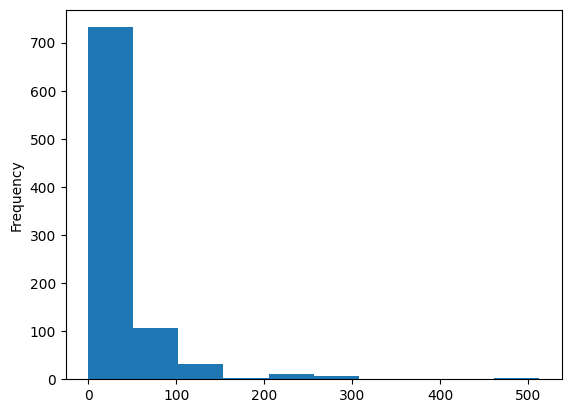

In [30]:
df["Fare"].plot(kind="hist")

<Axes: ylabel='Density'>

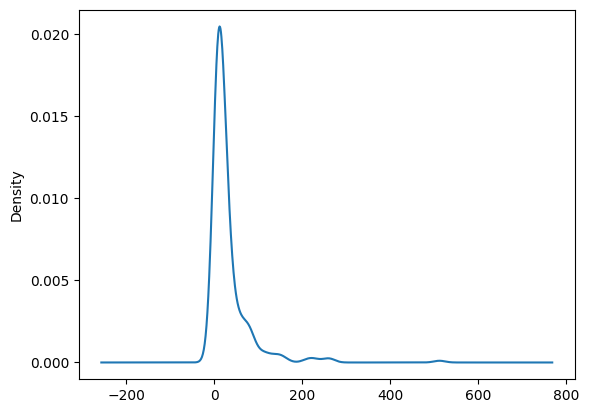

In [31]:
df["Fare"].plot(kind="kde") # kernel density estimation

In [32]:
# qual a taxa de sobrevivência do titanic?

df["Survived"].nunique()

2

In [25]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
df["Survived"].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [27]:
df["Survived"].mean()

0.3838383838383838

**Pergunta: qual é proporção de homens/mulheres que morreram/sobreviveram?**

Analisando a proporção de homens

In [28]:
df_male = df[df["Sex"] == "male"]

df_male["Survived"].value_counts(normalize=True)

Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64

In [29]:
df[df["Sex"] == "male"]["Survived"].value_counts(normalize=True)

Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64

In [30]:
df.query("Sex == 'male'")["Survived"].value_counts(normalize=True)

Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64

In [31]:
df.query("Sex == 'male'")["Survived"].mean()

0.18890814558058924

Analisando a proporção de mulheres

In [32]:
df.query("Sex == 'female'")["Survived"].mean()
# neste caso, o cálculo da média pela tabela conter apenas valores binários (0 e 1), o cálculo é baseado apenas na sobrevivência
# por conta da morte ser representada por 0 e o cálculo da média em si ter mais usabilidade com o número 1.
# assim a

0.7420382165605095

In [33]:
df_female = df[df['Sex']=='female']['Survived'].value_counts(normalize=True)
df_female

Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64

**Pergunta: idem da anterior, mas com relação às classes?**

In [34]:
df.query("Sex == 'male' and Pclass == 1")["Survived"].mean()

0.36885245901639346

In [35]:
df.query("Sex == 'male' and Pclass == 2")["Survived"].mean()

0.1574074074074074

In [36]:
df.query("Sex == 'male' and Pclass == 3")["Survived"].mean()

0.13544668587896252

Analisando o sexo feminino

In [37]:
df.query("Sex == 'female' and Pclass == 1")["Survived"].mean()

0.9680851063829787

In [38]:
df.query("Sex == 'female' and Pclass == 2")["Survived"].mean()

0.9210526315789473

In [39]:
df.query("Sex == 'female' and Pclass == 3")["Survived"].mean()

0.5

### Groupby

O .groupby() é um método super útil que nos ajuda a construir uma **tabela dinâmica** (pivot table) com os dados.

Esse tipo de estrutura nos ajuda muito a fazer a importante etapa de **olhar pros dados**

Vamos usar esta estrutura para responder a pergunta acima!

Precisamos de uma **função de agregação**, que é qual a função que vamos aplicar aos dados agrupados.

Eu quero olhar pros valores da coluna "Survived", agrupados por "Pclass" e "Sex".

Mas que função de agregação usar?

Como a coluna "Survived" tem apenas valores binários 1 e 0, eu posso usar a média!

Ex: [1 0 0 0 0 1 1], média: 3/7 = 42.85%. Ou seja, 42.86% sobreviveram, e 57.14% morreram

In [40]:
df.groupby(["Pclass", "Sex"])["Survived"].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [41]:
df.groupby(["Pclass", "Sex"])[["Survived"]].mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [42]:
df.groupby(["Pclass", "Sex"])[["Survived"]].std()

Survived
Pclass Sex             
1      female  0.176716
       male    0.484484
2      female  0.271448
       male    0.365882
3      female  0.501745
       male    0.342694

In [43]:
df.groupby(["Pclass", "Sex"])[["Survived"]].agg(["mean", "min", "max", "std"])

Survived                  
                   mean min max       std
Pclass Sex                               
1      female  0.968085   0   1  0.176716
       male    0.368852   0   1  0.484484
2      female  0.921053   0   1  0.271448
       male    0.157407   0   1  0.365882
3      female  0.500000   0   1  0.501745
       male    0.135447   0   1  0.342694

In [44]:
# agg -> agregação. Pela média, min e max. O mesmo serve para passar mais formas de agregação
df.groupby(["Pclass", "Sex"])[["Fare"]].agg(["mean", "min", "max", "std"]) 

Fare                              
                     mean      min       max        std
Pclass Sex                                             
1      female  106.125798  25.9292  512.3292  74.259988
       male     67.226127   0.0000  512.3292  77.548021
2      female   21.970121  10.5000   65.0000  10.891796
       male     19.741782   0.0000   73.5000  14.922235
3      female   16.118810   6.7500   69.5500  11.690314
       male     12.661633   0.0000   69.5500  11.681696

Também é possível fazer uma pivot table através da função **pd.pivot_table()**

In [45]:
# perceba que é a mesma coisa que o pivot table que está abaixo
df.groupby(["Pclass", "Sex"])[["Survived"]].mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [46]:
# "Tabela dinâmica" usando pandas!

pd.pivot_table(df, "Survived", "Pclass", "Sex", aggfunc=["mean", "std"])

mean                 std          
Sex       female      male    female      male
Pclass                                        
1       0.968085  0.368852  0.176716  0.484484
2       0.921053  0.157407  0.271448  0.365882
3       0.500000  0.135447  0.501745  0.342694

In [47]:
df.groupby(["Pclass", "Sex"])[["Fare"]].agg(["mean", "min", "max", "std"])

Fare                              
                     mean      min       max        std
Pclass Sex                                             
1      female  106.125798  25.9292  512.3292  74.259988
       male     67.226127   0.0000  512.3292  77.548021
2      female   21.970121  10.5000   65.0000  10.891796
       male     19.741782   0.0000   73.5000  14.922235
3      female   16.118810   6.7500   69.5500  11.690314
       male     12.661633   0.0000   69.5500  11.681696

In [48]:
pd.pivot_table(df, "Fare", "Pclass", "Sex", aggfunc=["mean", "min", "max", "std"])

mean                 min            max                  std  \
Sex         female       male   female male    female      male     female   
Pclass                                                                       
1       106.125798  67.226127  25.9292  0.0  512.3292  512.3292  74.259988   
2        21.970121  19.741782  10.5000  0.0   65.0000   73.5000  10.891796   
3        16.118810  12.661633   6.7500  0.0   69.5500   69.5500  11.690314   

                   
Sex          male  
Pclass             
1       77.548021  
2       14.922235  
3       11.681696

Outra pergunta: **qual a relação entre o porto de embarque, a taxa de sobrevivência, e a classe?**

In [49]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [50]:
# aqui é possível perceber que, adicionando contagem às taxas de sobrevivência se torna evidente que a taxa média fica total-
# -mente "errônea", pois claramente os portos que possuem quantidades muito distintas de pessoas que embarcaram, assim
# precisam ter uma visáo mais analítica, pois imaginammos um cenário de que duas pessoas entraram em um porto
# e ambas morreram, a taxa de sobreviventes naquele porto será nula, e é justamente por conta do infímo espaço
# amostral disponível para análise. Claro! é uma taxa válida, contudo muito enviesada, por conta do espaço amostral
# ser totalmente isento de análises mais trabalhadas

df.groupby(['Pclass', 'Embarked'])[['Survived']].agg(['mean','count'])

Survived      
                     mean count
Pclass Embarked                
1      C         0.694118    85
       Q         0.500000     2
       S         0.582677   127
2      C         0.529412    17
       Q         0.666667     3
       S         0.463415   164
3      C         0.378788    66
       Q         0.375000    72
       S         0.189802   353

___
___
___

Vamos explorar um pouco mais!

Em particular, vamos responder a pergunta do problema gerador:

## *Mulheres e crianças sobreviveram mais?*

In [51]:
# quantas pessoas morreram? Quantas sobreviveram?
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [52]:
# qual a proporção de sobreviventes e mortos?

df['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [53]:
# qual a quantidade de pessoas de casa sexo que morreu e sobreviveu?
df_agrupado_sexo = df.groupby(['Sex', 'Survived'])[['Survived']].agg('count')

Explicação Unstack -> Quando você aplica a função unstack() no DataFrame resultante do groupby, as categorias empilhadas se tornam colunas separadas, e cada valor da categoria mais interna (neste caso, 'Survived') se torna uma coluna independente com (0 e 1) no DataFrame. Isso facilita a visualização e comparação dos valores para cada subcategoria.

<Axes: xlabel='Sex,Survived'>

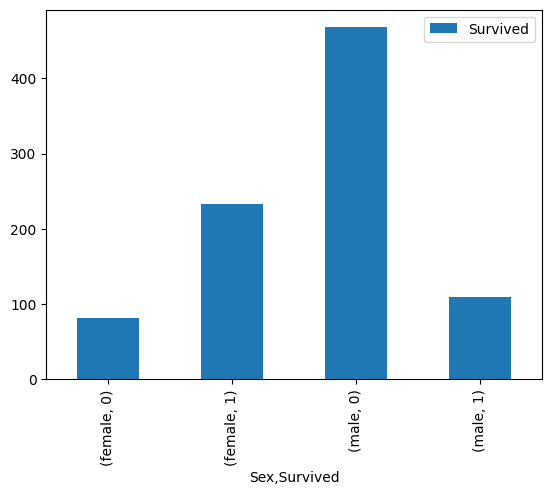

In [54]:
# exemplo sem stack. O survived que possui 0 (mortos) e 1 (vivos), está empilhado, assim ao plotar eles percentecem ao survived
# de forma dependente, desta forma, precisamos separar os 0 e 1 usando o unstack
df_agrupado_sexo.plot(kind='bar') 

Text(0.5, 1.0, 'Taxa de vivos e mortos')

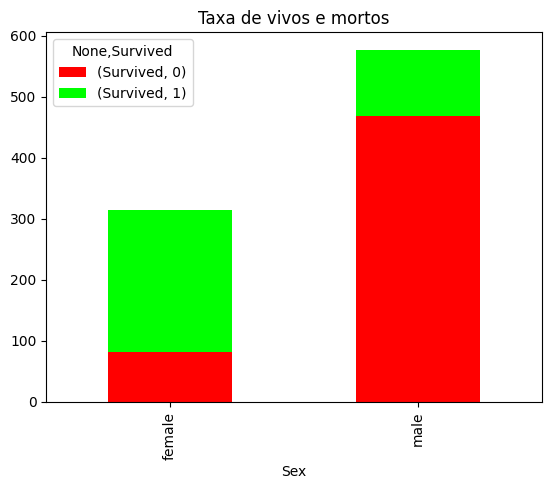

In [55]:
import matplotlib.pyplot as plt
# Plotar o gráfico de barras
df_agrupado_sexo.unstack().plot(kind='bar', stacked=True, color=['#FF0000', '#00FF00'])
plt.title('Taxa de vivos e mortos')

In [56]:
# modifique o groupby que fizemos acima do porto e classe pra incluir também o sexo como agrupador
# esse dataframe dá uma visão bem completa!

df.groupby(['Sex', 'Embarked', 'Pclass'])[['Survived']].mean()

Survived
Sex    Embarked Pclass          
female C        1       0.976744
                2       1.000000
                3       0.652174
       Q        1       1.000000
                2       1.000000
                3       0.727273
       S        1       0.958333
                2       0.910448
                3       0.375000
male   C        1       0.404762
                2       0.200000
                3       0.232558
       Q        1       0.000000
                2       0.000000
                3       0.076923
       S        1       0.354430
                2       0.154639
                3       0.128302

In [57]:
df.groupby(['Sex', 'Embarked', 'Pclass'])[['Survived']].agg(['mean', 'count'])

Survived      
                            mean count
Sex    Embarked Pclass                
female C        1       0.976744    43
                2       1.000000     7
                3       0.652174    23
       Q        1       1.000000     1
                2       1.000000     2
                3       0.727273    33
       S        1       0.958333    48
                2       0.910448    67
                3       0.375000    88
male   C        1       0.404762    42
                2       0.200000    10
                3       0.232558    43
       Q        1       0.000000     1
                2       0.000000     1
                3       0.076923    39
       S        1       0.354430    79
                2       0.154639    97
                3       0.128302   265

In [58]:
# agrupe agora por porto, classe, sexo e survived, e pegue as contagens de "survived"
# essa análise também dá uma visão interessante do perfil dos passageiros

df.groupby(['Sex', 'Embarked', 'Pclass', 'Survived'])[['Survived']].agg(['count'])

Survived
                                   count
Sex    Embarked Pclass Survived         
female C        1      0               1
                       1              42
                2      1               7
                3      0               8
                       1              15
       Q        1      1               1
                2      1               2
                3      0               9
                       1              24
       S        1      0               2
                       1              46
                2      0               6
                       1              61
                3      0              55
                       1              33
male   C        1      0              25
                       1              17
                2      0               8
                       1               2
                3      0              33
                       1              10
       Q        1      0               1
                2      0               1
                3      0              36
                       1               3
       S        1      0              51
                       1              28
                2      0              82
                       1              15
                3      0             231
                       1              34

In [59]:
# inclua idade na análise

df['Age'].nunique()

88

In [60]:
df.groupby(['Sex', 'Embarked', 'Pclass', 'Age'])[['Survived']].agg(['mean'])

Survived
                                mean
Sex    Embarked Pclass Age          
female C        1      16.0      1.0
                       17.0      1.0
                       18.0      1.0
                       19.0      1.0
                       21.0      1.0
...                              ...
male   S        3      51.0      0.0
                       55.5      0.0
                       59.0      0.0
                       61.0      0.0
                       74.0      0.0

[367 rows x 1 columns]

In [61]:
df.groupby(["Sex", "Embarked", "Pclass", "Age"])[["Survived"]].agg(["mean", "count"])

Survived      
                                mean count
Sex    Embarked Pclass Age                
female C        1      16.0      1.0     1
                       17.0      1.0     1
                       18.0      1.0     2
                       19.0      1.0     1
                       21.0      1.0     1
...                              ...   ...
male   S        3      51.0      0.0     3
                       55.5      0.0     1
                       59.0      0.0     1
                       61.0      0.0     1
                       74.0      0.0     1

[367 rows x 2 columns]

In [62]:
df.groupby(["Sex", "Pclass"])[["Age"]].agg(["mean", "count"])

Age      
                    mean count
Sex    Pclass                 
female 1       34.611765    85
       2       28.722973    74
       3       21.750000   102
male   1       41.281386   101
       2       30.740707    99
       3       26.507589   253

In [63]:
df.groupby(["Survived", "Sex", "Pclass"])[["Age"]].agg(["mean", "count"])

Age      
                             mean count
Survived Sex    Pclass                 
0        female 1       25.666667     3
                2       36.000000     6
                3       23.818182    55
         male   1       44.581967    61
                2       33.369048    84
                3       27.255814   215
1        female 1       34.939024    82
                2       28.080882    68
                3       19.329787    47
         male   1       36.248000    40
                2       16.022000    15
                3       22.274211    38

Podemos criar algumas novas variáveis também!

Como queremos fazer uma análise de idade, seria legal se criássemos uma coluna de **faixa etária**, não é mesmo?

Para isso, vamos conhecer o importante método `apply()`:

### Método `apply()` 

Esse método é extremamente útil para **modificar colunas** ou **criar novas colunas a partir de colunas antigas**.

O que ele faz é muito simples: **aplica uma função a todos os valores de uma série!**

In [64]:
df["Age"][800]

34.0

In [65]:
df["Age"][800] == "nan"

False

In [66]:
np.isnan(df["age"][1305])

KeyError: 'age'

In [81]:
idade = 20

def calc_faixa_etaria(idade):
    
    if np.isnan(idade):
        return "desconnhecida"
    elif idade <= 15:
        return "0-15"
    elif idade <= 30:
        return "15-30"
    elif idade <= 45:
        return "30-45"
    else:
        return "45+"

In [82]:
calc_faixa_etaria(6)

'0-15'

In [83]:
df["Age"].isnull().sum()

177

In [84]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [85]:
# quantos passageiros há em cada faixa etária? (0-15, 15-30, 30-45, 45+) (fechado superior, aberto inferior)

df["Age_group"] = df["Age"].apply(calc_faixa_etaria)

In [86]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-45
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,15-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,15-30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,desconnhecida
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,15-30


In [99]:
df.groupby('Sex')[['Survived']].agg('sum')

,Survived
Sex,
female,233
male,109


In [87]:
df["Age_group"].value_counts()

Age_group
15-30            326
30-45            202
desconnhecida    177
45+              103
0-15              83
Name: count, dtype: int64

Agora podemos responder algumas outras perguntas:

In [89]:
# quantos passageiros há em cada faixa etária? (0-15, 15-30, 30-45, 45+)

df["Age_group"].value_counts()

Age_group
15-30            326
30-45            202
desconnhecida    177
45+              103
0-15              83
Name: count, dtype: int64

In [79]:
# e qual a distribuição de sexo dentro de cada faixa etária?

df.groupby(['age_group','Sex'])[['Sex']].count()

KeyError: 'age_group'

Note que agora fica muito mais fácil responder às perguntas que respondemos antes com filtros:

In [75]:
# como era antes, era impossível identificar padrões de taxas de sobrevivência nas idades
df.groupby(["Age"])[["Survived"]].mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [100]:
# e qual a proporção de mortes/sobrevivência dentro de cada faixa etária?

df.groupby(["Age_group"])[["Survived"]].agg(["mean", "count"])

Survived      
                   mean count
Age_group                    
0-15           0.590361    83
15-30          0.358896   326
30-45          0.425743   202
45+            0.368932   103
desconnhecida  0.293785   177

In [101]:
df.groupby(["Age_group", "Sex"])[["Survived"]].agg(["mean", "count"])

Survived      
                          mean count
Age_group     Sex                   
0-15          female  0.651163    43
              male    0.525000    40
15-30         female  0.747826   115
              male    0.146919   211
30-45         female  0.780822    73
              male    0.224806   129
45+           female  0.866667    30
              male    0.164384    73
desconnhecida female  0.679245    53
              male    0.129032   124

In [102]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-45
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,15-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,15-30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,desconnhecida
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,15-30


In [78]:
df.groupby(["Age_group", "Sex", "Pclass"])[["Survived"]].agg(["mean", "count"])

KeyError: 'Age_group'

___
___
___

Agora que conhecemos o apply, vamos trabalhar com a coluna de nomes, que até agora não usamos, mas que pode conter informações importantes...

Primeiramente, vamos dar uma olhada na coluna de nomes:

In [ ]:
df["Name"]

Note que a estrutura dos nomes é:

**Sobrenome, Título. Primeiros Nomes**

Será que conseguimos extrair uma coluna **só com os sobrenomes?**

E outra coluna **só com os títulos?**

Vamos ver...

In [ ]:
string = "Sobrenome, Título. Primeiros Nomes"

string

In [ ]:
string.split(", ")[0] # extrair sobrenome

In [ ]:
string.split(", ")[1].split(". ")[0] # extrair titulo

In [ ]:
string.split(", ")[1].split('. ')[1] # extraindo nome

In [ ]:
def extrai_sobrenome(s):
    
    return s.split(", ")[0]

In [ ]:
df["surname"] = df["Name"].apply(extrai_sobrenome)
df

In [ ]:
def extrai_titulo(s):
    
    return s.split(", ")[1].split(". ")[0]

In [ ]:
df["title"] = df["Name"].apply(extrai_titulo)
df

In [ ]:
# x = 5, 5x2
(lambda x: 2*x)(5)

In [ ]:
df["Name"].apply(extrai_titulo)

In [ ]:
df["Name"].apply(lambda x: x.split(', ')[1].split('. ')[0]) # x representa cada elemento da lista

Parece que funcionou!

Agora, como podemos **aplicar** esse mesmo procedimento simultaneamente a todos os elementos da coluna de nomes?

Fazemos isso com o método `apply()`.

Podemos definir uma função que faz o que queremos, ou então, de forma mais simples, usar **funções lambda**!

Basta pegar a ação que fizemos (que é essencialmente o ".split(",")[0]"), e passar pra função lambda dentro do apply:

Note que foi retornada uma outra série, mas dessa vez apenas com os sobrenomes!

Podemos fazer com que essa série se torne uma nova coluna do df:


In [ ]:
# utilizando o apply pra criar colunas de titulo e sobrenome (veja acima!!)

df["surname"] = df["Name"].apply(extrai_sobrenome)
df["title"] = df["Name"].apply(extrai_titulo)

In [ ]:
df[["surname","title"]]

In [ ]:
df["Name"].nunique() # 891 nomes diferentes

In [ ]:
df["surname"].nunique() # 667 sobrenomes diferentes 

In [ ]:
df["surname"].value_counts()

In [ ]:
df["surname"].value_counts().values

In [ ]:
df["surname"].value_counts().value_counts()
# explicação do retorno
# quantos nomes aparecem só uma vez (534)
# quantos nomes aparecem duas vezes (83)
# (...)

# vendo a tabela acima deste código é possível perceber que ele faz a contagem de cada valor

In [ ]:
df["title"].nunique()

In [ ]:
df["title"].value_counts()

In [ ]:
df[df["title"] == "Jonkheer"]

In [33]:
df[df["Fare"] > 400] # vendo quem comprou as passagens mais caras

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
df[~df["title"].isin(["Mr", "Miss", "Mrs", "Master", "Rev", "Dr", "Col"])]
# ~ -> operador de negação, ou seja o que eu passei no isin, ele vai passar o que NÃO ESTÁ NESTA lISTA.
# ou seja, se eu passei ["Mr", "Miss", "Mrs", "Master", "Rev", "Dr", "Col"], ele vai me passar títulos que não
# correspondem a estes nomes.

Essas pessoas existiram!

<a href=https://en.wikipedia.org/wiki/Manuel_Uruchurtu_Ram%C3%ADrez>Manuel Uruchurtu</a>

<a href=https://www.encyclopedia-titanica.org/titanic-victim/edward-gifford-crosby.html>Edward Crosby</a>

<a href=https://www.themarysue.com/the-countess-of-rothes/>Countess of Rothes</a>

Vamos ver alguns religiosos...

In [ ]:
df[df["title"] == "Rev"]

Este processo que fizemos é o chamado **feature engineering**, que consiste em utilizar features originais (nome) para criar **novas features** que possivelment podem ser mais úteis que a feature original.

Isto é, o nome completo de uma pessoa, pode não ser um indicativo tão forte da morte/sobrevivência... Mas o título, pode ser que seja!

_______

## *Rose e Jack estão na base?*

In [ ]:
# selecionar todas as Roses da base
# x = nome


df[df["Name"].apply(lambda x: "Rose" in x)]

In [ ]:
# x = nome

df[df["Name"].apply(lambda x: "Jack" in x)]

In [ ]:
df.query("sex == 'female' and pclass == 1 and 17 <= age <= 20")

____

Agora que terminamos de processar a base, seria interessante salvá-la para que não perdêssesmos as alteracões que fizemos.

O pandas permite salvar os arquivos com uma única linha de código!

In [ ]:
df

Para salvar o arquivo em formato ".csv":

In [ ]:
df.to_csv("titanic_processada.csv", index=False)

Se quiser salvar como um arquivo de excel:

In [ ]:
df.to_excel("titanic_processada.xlsx")

___


______
_____
___